# Backtrack Testbed Notebook

Short notebook to test Bryans functions.

In [64]:
# Standard library
import sys

import numpy as np
import matplotlib.pyplot as plt

import metpy 

We want MetPy ver 1.6.1

In [65]:
# !pip install metpy --upgrade

In [85]:
print(f" Harnessing the power of MetPy version {metpy.__version__} ️")

 Harnessing the power of MetPy version 1.6.1 ️


In [66]:
sys.path.insert(1, '../sealsml')

# Random u and v data

In [67]:
# Set the number of examples
num_examples = 100

# Generate random u and v components using a normal distribution with mean 0 and standard deviation 5
u_data = np.random.normal(loc=0, scale=5, size=num_examples)
v_data = np.random.normal(loc=0, scale=5, size=num_examples)

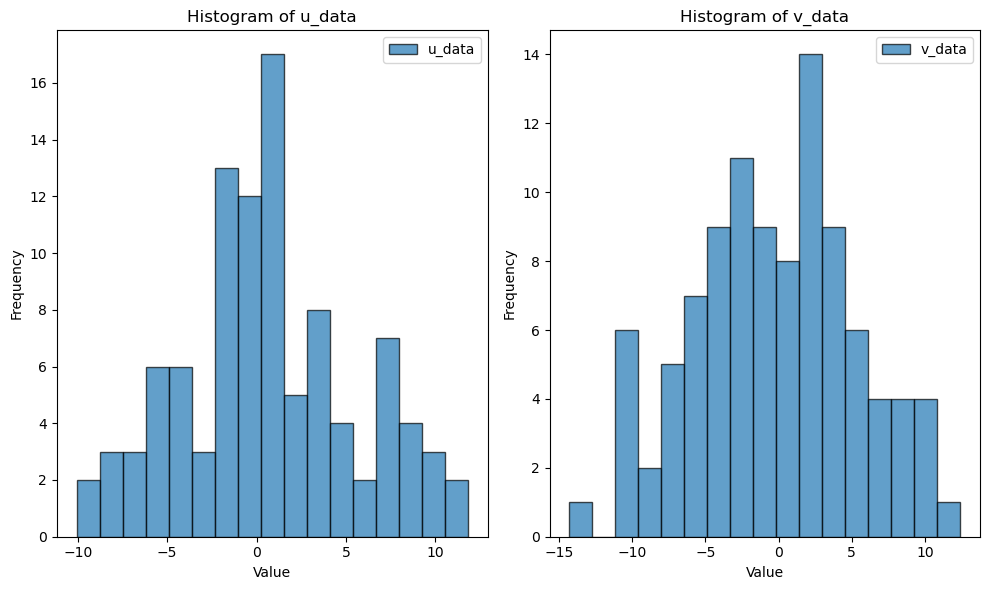

In [68]:
n_bins = 17

# Create the subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

# Create the histograms
ax1.hist(u_data, bins=n_bins, edgecolor='black', alpha=0.7, label='u_data')
ax2.hist(v_data, bins=n_bins, edgecolor='black', alpha=0.7, label='v_data')

# Add labels and title
ax1.set_xlabel('Value')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram of u_data')
ax2.set_xlabel('Value')
ax2.set_ylabel('Frequency')
ax2.set_title('Histogram of v_data')

# Add legend
ax1.legend()
ax2.legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Let's compare to MetPy Calc

In [69]:
from backtrack import polar

In [91]:
from metpy.calc import wind_direction
from metpy.calc import wind_speed

from metpy.units import units

In [71]:
angle, speed = polar(u_data,v_data)

In [72]:
wind_dir = wind_direction(u_data*units("m/s"), v_data*units("m/s"))

wind_speed = wind_speed(u_data*units("m/s"), v_data*units("m/s"))

In [73]:
if np.allclose(speed, wind_speed.magnitude, rtol=1e-6):  # Relative tolerance of 1e-4
    print("Arrays match within 6 decimal places!")
else:
    print("Arrays do not match within 6 decimal places.")

Arrays match within 6 decimal places!


Looks like the speeds match

In [74]:
if np.allclose(angle, wind_dir.magnitude, rtol=1e-6):  # Relative tolerance of 1e-4
    print("Arrays match within 6 decimal places!")
else:
    print("Arrays do not match within 6 decimal places.")

Arrays do not match within 6 decimal places.


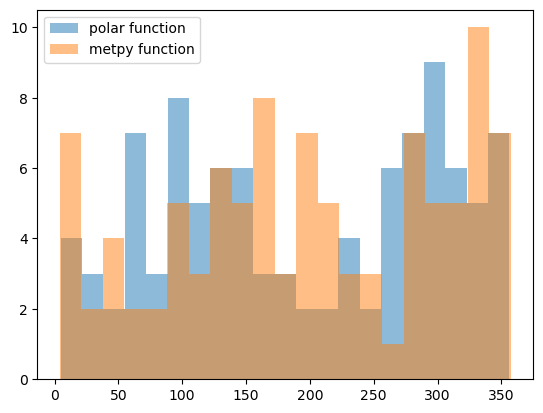

In [75]:
plt.hist(angle,    bins=21, alpha=0.5, label='polar function')
plt.hist(wind_dir, bins=21, alpha=0.5, label='metpy function')
plt.legend()

Let's test a pure east case

In [76]:
angle = np.rad2deg(np.arctan2(0, 10))
angle

0.0

In [77]:
wind_dir = wind_direction(10*units("m/s"), 0*units("m/s"))
wind_dir

array(270.) <Unit('degree')>

If we want to do this the oceanographic way:

In [78]:
wind_dir = wind_direction(10*units("m/s"), 0*units("m/s"), convention='to')
wind_dir

array(90.) <Unit('degree')>

From the north:

In [79]:
wind_dir = wind_direction(0*units("m/s"), -15*units("m/s"))
wind_dir

array(360.) <Unit('degree')>

## 1. For the polar function, I reccomend replacing it with the MetPy function, as it will follow the convention for most atmospheric scienctists and matches the current azimuth function to have 0/360 as North.  It will also be less code to maintain and test :)

Now let's test the polar 2D function

In [86]:
u_reshaped = u_data.reshape(10,10)*units("m/s")
v_reshaped = v_data.reshape(10,10)*units("m/s")

In [87]:
wind_dir_2d = wind_direction(u_reshaped, v_reshaped)
wind_dir_2d.magnitude

array([[ 81.70022526, 159.91972529,  90.42850921, 126.20322799,
          7.82558601, 274.64708472, 326.73575989, 189.96176002,
        203.33217593, 118.58144385],
       [323.96256557,  45.86191866, 212.98163916, 324.44808053,
        136.93565597, 237.08476051, 179.91373424, 218.54953023,
        147.48950342, 325.20131418],
       [ 75.40002078, 282.8255426 ,  48.71513269, 321.02739179,
        351.58796545,  20.05406146,  34.02112119, 214.79268788,
         13.05796915, 315.30023928],
       [297.27367409, 179.25201801, 309.03788873, 122.7672221 ,
        285.0426301 ,  95.91045958, 353.11914182, 170.73780273,
        301.01475949, 323.0081381 ],
       [273.89518104, 328.12218011, 195.10203623, 211.1055633 ,
         67.29513509, 122.03540433, 174.11543282, 153.29089467,
          4.78196121, 357.43049262],
       [  9.52061365, 305.23843876, 134.61781255, 299.57396958,
        203.21629817, 231.92480021, 319.20480783, 352.46242197,
        298.98010526,  38.74112624],
       [28

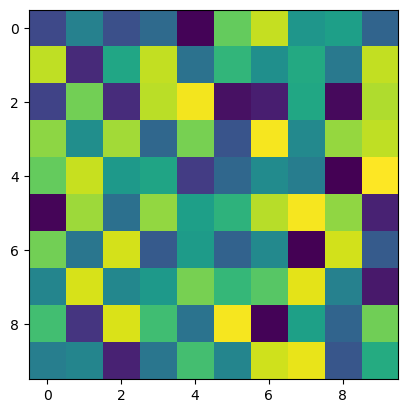

In [92]:
plt.imshow(wind_dir_2d)

In [93]:
wind_speed_2d = wind_speed(u_reshaped, v_reshaped)

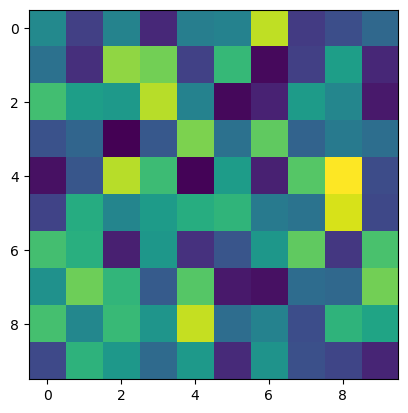

In [94]:
plt.imshow(wind_speed_2d)

## 2. For polar 2D, I reccomend using MetPy functions again as it does not require use of indicies for 2D arrays, and will match single point calculations as above as far as 0/360 being north. 

lets try to find Ch4 max, first lets make an array of random ch4 data

In [95]:
# Define number of data points
N = 5000

# Generate random frequencies and amplitudes for sin and cos
freq_sin = np.random.uniform(0.1, 0.5)
amp_sin = np.random.uniform(0.5, 1.5)
freq_cos = np.random.uniform(0.2, 0.8)
amp_cos = np.random.uniform(0.5, 1.5)

# Generate time series data as a 1D array
t = np.linspace(0, 20, N)
data = amp_sin * np.sin(freq_sin * t) + amp_cos * np.cos(freq_cos * t) + np.random.randn(N) * 0.05


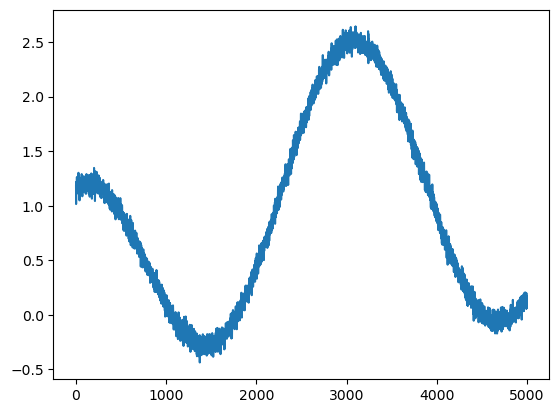

In [96]:
plt.plot(data)

In [97]:
np.size(data) == np.size(t)

True

In [98]:
from backtrack import findmaxC, findmaxCH4_noloop

In [99]:
%%time

max_c, time_max_c, ijk_max = findmaxC(data, t)

CPU times: user 582 µs, sys: 1e+03 ns, total: 583 µs
Wall time: 586 µs


In [100]:
%%time 

max_c_noloop, time_max_c_noloop, ijk_max_noloop = findmaxCH4_noloop(data, t)

CPU times: user 29 µs, sys: 9 µs, total: 38 µs
Wall time: 38.1 µs


In [101]:
if max_c == max_c_noloop:
    print("max_c: Passed")
else:
    print("max_c: Failed")

if time_max_c == time_max_c_noloop:
    print("time_max_c: Passed")
else:
    print("time_max_c: Failed")

if ijk_max == ijk_max_noloop:
    print("ijk_max: Passed")
else:
    print("ijk_max: Failed")

max_c: Passed
time_max_c: Passed
ijk_max: Passed


## 3. Lets use the no-loop implementation, it is much faster and requires one less input